   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
we have 300 ratings
Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285], dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (44, 3)


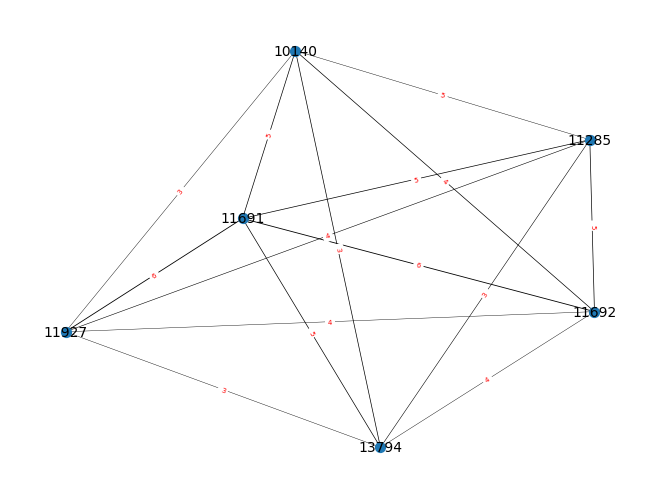

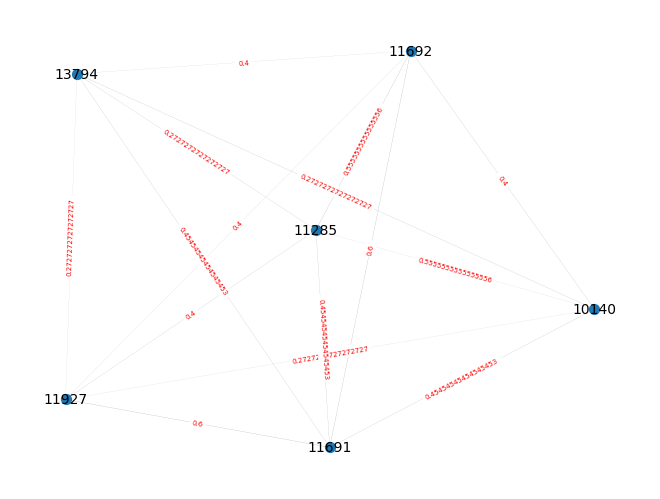

 LISTA DE ARESTAS ARVORE MAXIMA: [(11691, 11927), (11691, 11692), (11691, 13794), (11691, 10140), (11691, 11285)]
APLICANDO BFS A PARTIR DE UM NÓ INICIAL: [(13794, 11691), (11691, 11927), (11691, 11692), (11691, 10140), (11691, 11285)]


C:\Users\Jullia\AppData\Local\Temp\ipykernel_9812\262590566.py:238: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(maximum_spanning_tree, pos, edge_color="green", width=2)


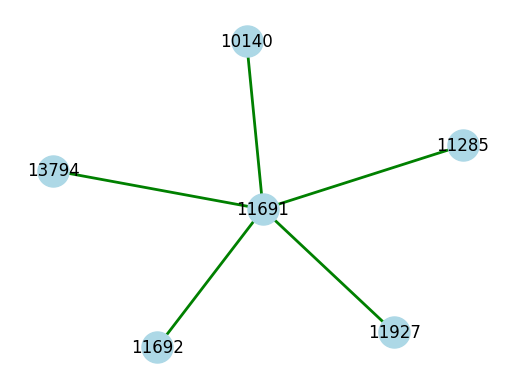

Recomendações para o usuário 11691: [3, 14]


In [4]:
##Codigo acima mas organizado
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ... Seu código anterior ...
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
print(books.head(3))

######################################
books.drop_duplicates(inplace=True) #Retira os dados repetidos

print('we have',books.shape[0], 'ratings')
books.head()
##########################################

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 7
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)

##############################################################################

import networkx as nx
import matplotlib.pyplot as plt

def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Inicializa o dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    G.add_edge(user1, user2, weight=weight)  # Adicione o atributo 'weight' à aresta
                    edge_weights[(user1, user2)] = weight  # Armazene o peso no dicionário
    
    return G, edge_weights


# Crie o grafo
G, edge_weights = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

###############################################################################################
# Função para calcular o coeficiente de Jaccard entre dois conjuntos
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    # print(f"books: {set1} e {set2}")
    # print(f"intersection: {intersection}")
    # print(f"union: {union}")
    # print(f"Jaccand: {intersection/union}")
    return intersection / union if union != 0 else 0

# Função para criar um grafo ponderado com base no coeficiente de Jaccard
def create_user_graph_with_jaccard(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                # print(f"user1: {user1} e user2: {user2}")
                jaccard = jaccard_similarity(books_user1, books_user2)
                if jaccard > 0:  # Apenas considere pares com coeficiente de Jaccard maior que 0
                    edge_weights[(user1, user2)] = jaccard
                    
                    weight = jaccard
                    G.add_edge(user1, user2, weight=weight)
    
    return G, edge_weights

###############################################################################

# Crie o grafo com coeficiente de Jaccard
GAux = G
GAux, edge_weights = create_user_graph_with_jaccard(y, books)

# ... O restante do seu código para visualização do grafo ...
# Exemplo de layout para visualização
pos = nx.spring_layout(GAux)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in GAux.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(GAux, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(GAux, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(GAux, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

##############################################################################################

import networkx as nx

## Função para construir a Árvore Geradora Máxima a partir de um nó inicial
def build_maximum_spanning_tree(graph, start_node):
    T = nx.Graph()
    visited = set()
    visited.add(start_node)
    # print(f"start_node: {start_node}")
    # print(f"visited: {visited}")
    
    while len(visited) < len(graph.nodes()):
        max_weight = -float('inf') #Pega o - infinito para ser o menro valor possivel, ja que a arvore minima engloba os negativos
        max_edge = None
        
        for node in visited:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    weight = graph[node][neighbor]['weight']  # Obtenha o peso da aresta diretamente
                    if weight > max_weight:
                        # print(f"node: {node}")
                        # print(f"neighbor: {neighbor}")
                        max_weight = weight
                        max_edge = (node, neighbor)
        
        if max_edge:
            print("aqiiii")
            u, v = max_edge
            T.add_edge(u, v, weight=max_weight)
            visited.add(v)
            print(visited)
    
    print(visited)
    return T
####################################################################################
# Escolha um nó inicial
GMst = G
start_node = y[0]  # Por exemplo, você pode escolher o primeiro nó na sua lista de usuários selecionados (y)


# Construa a Árvore Geradora Máxima a partir do nó inicial
# maximum_spanning_tree = nx.maximum_spanning_tree(GMst, start_node)
maximum_spanning_tree = nx.maximum_spanning_tree(GMst)
print(f" LISTA DE ARESTAS ARVORE MAXIMA: {maximum_spanning_tree.edges}")


#ARVORE MINIMA 
minimum_spanning_tree = nx.minimum_spanning_tree(GMst)

# # Visualize a Árvore Geradora Minima
# pos = nx.spring_layout(minimum_spanning_tree)

# # Desenhe os nós
# nx.draw_networkx_nodes(minimum_spanning_tree, pos, node_color="lightblue", node_size=500)

# # Desenhe as arestas da Árvore Geradora Minima
# nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color="green", width=2)

# # Desenhe os rótulos dos nós
# node_labels = {node: node for node in minimum_spanning_tree.nodes()}
# nx.draw_networkx_labels(minimum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

# plt.axis("off")
# plt.show()

lista = list(nx.bfs_edges(maximum_spanning_tree, source=13794))
print(f"APLICANDO BFS A PARTIR DE UM NÓ INICIAL: {lista}")

# Visualize a Árvore Geradora Máxima
pos = nx.spring_layout(maximum_spanning_tree)

# Desenhe os nós
nx.draw_networkx_nodes(maximum_spanning_tree, pos, node_color="lightblue", node_size=500)

# Desenhe as arestas da Árvore Geradora Máxima
nx.draw_networkx_edges(maximum_spanning_tree, pos, edge_color="green", width=2)


# Desenhe os rótulos dos nós
node_labels = {node: node for node in maximum_spanning_tree.nodes()}
nx.draw_networkx_labels(maximum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()
###########################################################################################
# #Podando o grafo baseado na similiaridade
# import networkx as nx

# # Suponha que você já tenha criado seu grafo G com as arestas ponderadas pela similaridade de Jaccard.

# # Crie uma cópia do grafo original
# pruned_G = GAux.copy()

# # Itere por todas as arestas do grafo
# for edge in GAux.edges(data=True):
#     source, target, data = edge
#     similarity = data['weight']  # Certifique-se de que 'weight' seja o atributo correto

#     # print(f"Similaridade entre {source} e {target}: {similarity}")

#     if similarity <= 0.5:
#         # print(f"Removendo aresta entre {source} e {target}")
#         pruned_G.remove_edge(source, target)



# # Obtenha o grafo podado com base na similaridade
# pruned_G = pruned_G.subgraph(pruned_G.nodes())

# # Agora pruned_G contém apenas os nós e as arestas com uma similaridade maior que 2.5


# # Exemplo de layout para visualização
# pos = nx.spring_layout(pruned_G)

# # Obtém os rótulos das arestas (peso das arestas)
# edge_labels = {(source, target): data['weight'] for source, target, data in pruned_G.edges(data=True)}

# # Desenhe os nós com rótulos
# nx.draw(pruned_G, pos, with_labels=True, node_size=200, font_size=8, font_color='black')

# # Desenhe as arestas com rótulos
# nx.draw_networkx_edges(pruned_G, pos, width=1.0, alpha=0.5)
# nx.draw_networkx_edge_labels(pruned_G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

# # Mostre o gráfico
# plt.axis('off')
# plt.show()


# ##Arvore geradora minima para esse grafo ja podado
# GMst = pruned_G
# start_node = y[0]  # Por exemplo, você pode escolher o primeiro nó na sua lista de usuários selecionados (y)

# # Construa a Árvore Geradora Máxima a partir do nó inicial
# maximum_spanning_tree = build_maximum_spanning_tree(GMst, start_node)

# # Visualize a Árvore Geradora Máxima
# pos = nx.spring_layout(maximum_spanning_tree)

# # Desenhe os nós
# nx.draw_networkx_nodes(maximum_spanning_tree, pos, node_color="lightblue", node_size=500)

# # Desenhe as arestas da Árvore Geradora Máxima
# nx.draw_networkx_edges(maximum_spanning_tree, pos, edge_color="green", width=2)

# # Desenhe os rótulos dos nós
# node_labels = {node: node for node in maximum_spanning_tree.nodes()}
# nx.draw_networkx_labels(maximum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

# plt.axis("off")
# plt.show()


###############################################################################################





# # Exemplo: Recomendar livros com base em usuários semelhantes com similaridade maior ou igual a 0.3
# def recommend_books(user_id, books, GAux, edge_weights, num_recommendations, min_similarity):
#     similar_users = [node for node in GAux.neighbors(user_id)]
#     book_ids = set(books[books['user_id'] == user_id]['book_id'])
#     recommendations = []

#     for user in similar_users:
#         user_books = set(books[books['user_id'] == user]['book_id'])
#         common_books = user_books.difference(book_ids)
#         similarity = edge_weights.get((user_id, user), 0)  # Obtém a similaridade de Jaccard entre os usuários
        
#         if similarity >= min_similarity:  # Considere apenas pares com similaridade maior ou igual a min_similarity
#             for book in common_books:
#                 recommendations.append((book, similarity))
    
#     recommendations.sort(key=lambda x: x[1], reverse=True)
    
#     return [book for book, _ in recommendations[:num_recommendations]]

# # Recomendação para um usuário
# user_id_to_recommend = 11691  # O ID do usuário desejado
# recommended_books = recommend_books(user_id_to_recommend, books, GAux, edge_weights, num_recommendations=7, min_similarity=0.3)
# print("Recomendações para o usuário {}: {}".format(user_id_to_recommend, recommended_books))



import networkx as nx
from collections import deque

def recommend_books_with_bfs(user_id, books, GAux, edge_weights, min_similarity):
    # Inicialize um dicionário de cores para os nós: branco, cinza e preto
    colors = {node: 'white' for node in GAux.nodes()}
    
    # Encontre todos os nós em um caminhamento BFS a partir do nó de origem
    queue = deque([user_id])
    colors[user_id] = 'gray'
    
    bfs_recommendations = []
    
    while queue:
        node = queue.popleft()
        similar_users = [n for n in GAux.neighbors(node)]

        for user in similar_users:
            if colors[user] == 'white':
                colors[user] = 'gray'
                user_books = set(books[books['user_id'] == user]['book_id'])
                book_ids = set(books[books['user_id'] == user_id]['book_id'])
                common_books = user_books.difference(book_ids)
                similarity = edge_weights.get((user_id, user), 0)

                if similarity >= min_similarity:
                    for book in common_books:
                        bfs_recommendations.append((book, similarity))
                
                queue.append(user)
        
        colors[node] = 'black'
    
    bfs_recommendations.sort(key=lambda x: x[1], reverse=True)
    
    return [book for book, _ in bfs_recommendations]

# Exemplo de uso:
user_id_to_recommend = 11691  # O ID do usuário desejado
recommended_books = recommend_books_with_bfs(user_id_to_recommend, books, GAux, edge_weights, min_similarity=0.5)
print("Recomendações para o usuário {}: {}".format(user_id_to_recommend, recommended_books))






# Obtém todas as similaridades do nó de referência para outros nós
similarities_to_reference_node = {}
for node in GAux.nodes():
    if node != user_id_to_recommend:
        similarity = edge_weights.get((user_id_to_recommend, node), 0)
        similarities_to_reference_node[node] = similarity

# Exibe as similaridades
# for node, similarity in similarities_to_reference_node.items():
#     print(f"Similaridade com o usuário {node}: {similarity}")

    